In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
best_data = None
best_dir = None

for root, dirs, files in os.walk('./logs'):
    for dir in dirs:
        if dir.startswith('ast') and dir.split('_')[-2] == 'small' and 'OLD' not in f'{root}/{dir}':
            with open(f'{root}/{dir}/data.json') as f:
                data = json.load(f)
            if best_data is None or best_data['test_accuracy'] < data['test_accuracy']:
                best_data = data
                best_dir = f'{root}/{dir}'

In [3]:
predictions = best_data['predictions']
real_labels = best_data['real_labels']
label_to_index = best_data['label_to_index']

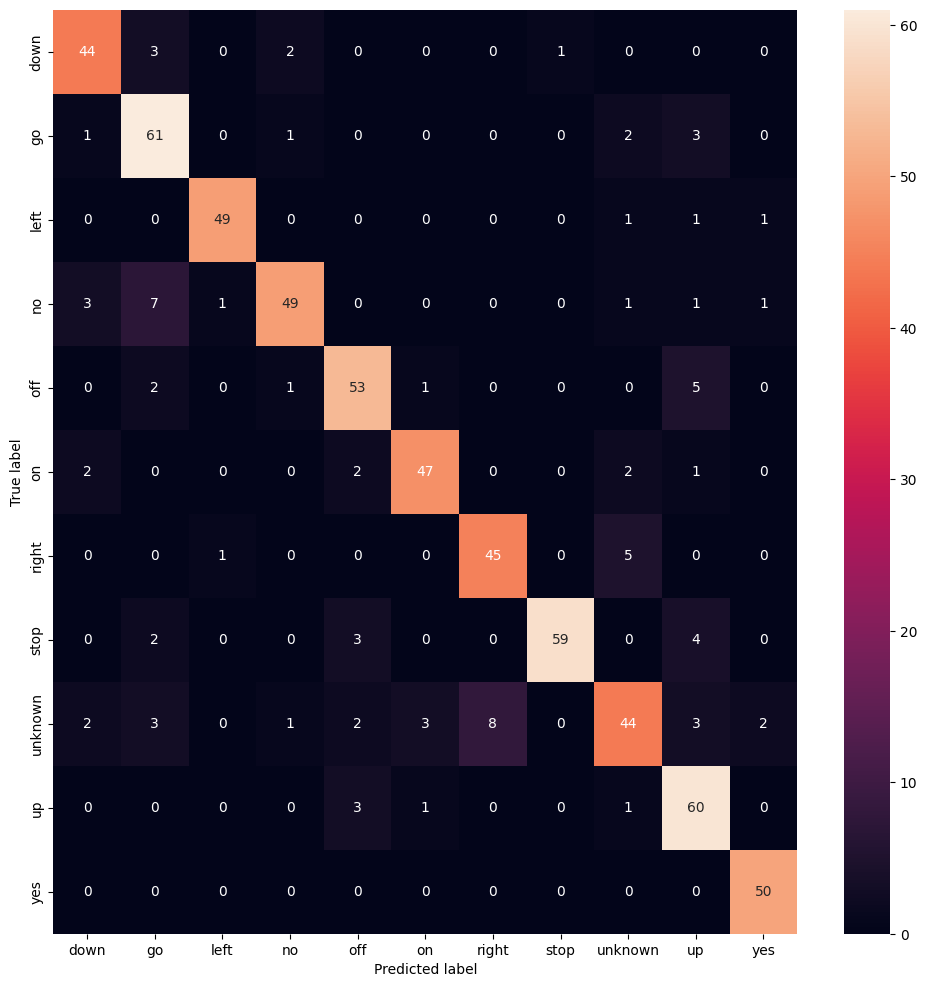

In [4]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(real_labels, predictions)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
# save the plot
plt.savefig('plots/ast-confusion_matrix.png', bbox_inches='tight')
plt.show()

In [5]:
round(best_data['test_accuracy'], 3)

0.862